In [1]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
from continuation import continuation

\begin{equation}
\begin{cases}
x' = -x - y\\
y' = -p*z + r*y + s*z^2 - y*z^2\\
z' = -q(x + z)
\end{cases}
\end{equation}

In [2]:
@jax.jit
def maasch_rule(u, p):
    x, y, z = u[...,0], u[...,1], u[...,2]
    q, r, s, = 1.2, 0.8, 0.8
    dx = -x - y
    dy = -p*z + r*y + s*z*z - z*z*y
    dz = -q*(x + z)
    return jnp.stack([dx, dy, dz], axis=-1)

In [4]:
pmin = -0.1
pmax = 2
delta = 0.9
p0 = 0.0
x0 = jnp.array([-1.4, -1.4, -1.4])
dp0 = 0.02
dx0 = jnp.array([0.01, 0.01, 0.01])


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [5]:
xs, ps, stability = continuation(maasch_rule, x0, p0, pmin, pmax, dp0, dx0)

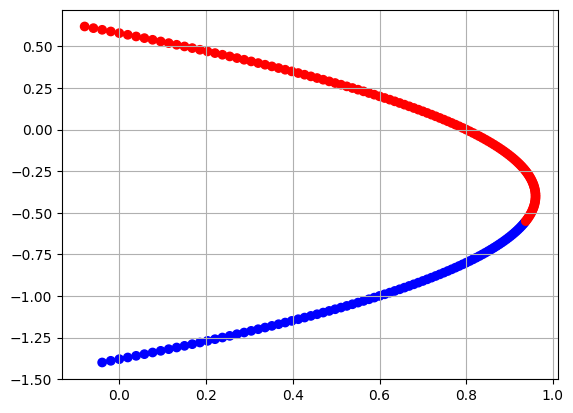

In [6]:
colors = ["blue" if s else "red" for s in stability]

plt.scatter(ps, [x[0] for x in xs], c=colors)
plt.grid()
plt.show()